<a href="https://colab.research.google.com/github/shirleysheng/anomaly_detection/blob/master/one_class_svm_interest_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

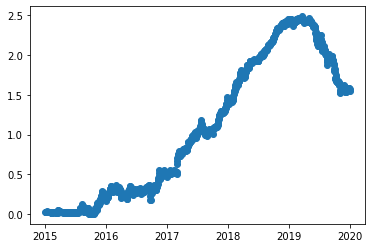

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM 

data = pd.read_csv('/content/IRs.csv',index_col=0)
data.index = pd.to_datetime(data.index)
interest_rate = data.iloc[:,1:5].dropna()

feature1 = plt.scatter(interest_rate.index, data.iloc[:,1])



In [20]:
interest_rate.head()

,3 Mo,6 Mo,1 Yr,2 Yr
Date,,,,
2015-01-02,0.02,0.11,0.25,0.66
2015-01-05,0.03,0.10,0.26,0.68
2015-01-06,0.03,0.10,0.25,0.65
2015-01-07,0.03,0.09,0.25,0.62
2015-01-08,0.03,0.08,0.23,0.62


In [0]:
test_data = interest_rate['2019'].dropna()
train_data = interest_rate[~interest_rate.isin(test_data)].dropna()



In [0]:
svm = OneClassSVM(kernel='rbf', nu=0.05, gamma=0.0001) 
svm.fit(train_data)
y_pred=svm.predict(test_data)

value, count = np.unique(y_pred, return_counts = True)
outlier = test_data[y_pred == -1]

Text(0, 0.5, '1_year_rate')

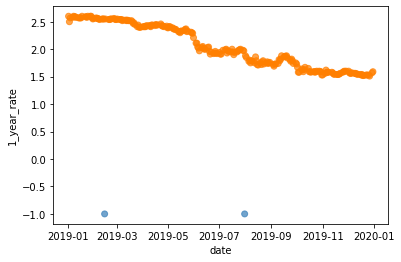

In [23]:
x = test_data.index
y = test_data.iloc[:,2]
colors = np.array(['#377eb8', '#ff7f00'])
plt.scatter(x, y, alpha=0.7, c=colors[(y_pred + 1) // 2]) 
plt.xlabel('date') 
plt.ylabel('1_year_rate')

In [24]:
outlier


,3 Mo,6 Mo,1 Yr,2 Yr
Date,,,,
2019-02-14,2.43,2.51,-1.0,2.50
2019-07-31,2.08,2.10,-1.0,1.89
